**Homework 5**

(1) In this part, we will predict the number of applications received
using the other variables in the $\it{College}$ data set.

In [77]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error

Load the 'College.csv' data set

In [87]:
df = pd.read_csv('College.csv')
df['Private'] = df['Private'].map({'Yes': 1, 'No': 0})
df.head(777)


,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,1,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,1,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,1,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,1,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,Worcester State College,0,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
773,Xavier University,1,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
774,Xavier University of Louisiana,1,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
775,Yale University,1,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99


(a) Split the data set into a training set and a test set.

In [88]:
train , test = train_test_split(df, test_size = 0.7)
X_test = train.drop(['Unnamed: 0','Apps'], axis=1)
Y_test = train['Apps']
X_train = test.drop(['Unnamed: 0','Apps'], axis=1)
Y_train = test['Apps']

(b) Fit a linear model using least squares on the training set, and
report the test error obtained.

In [91]:
linreg = LinearRegression().fit(X_train,Y_train)
linreg = linreg.predict(X_test)
print("Linear Regression Error is: " +str(mean_squared_error(Y_test, linreg)))

Linear Regression Error is: 911222.6544301702


(c) Fit a ridge regression model on the training set, with $\lambda$ chosen
by cross-validation. Report the test error obtained.

In [95]:
alphas = 10**np.linspace(10,-2,100)*0.5
ridgereg = RidgeCV(alphas=alphas, store_cv_values=True).fit(X_train, Y_train)
ridgereg = ridgereg.predict(X_test)
print("Ridge Regression Error is: " +str(mean_squared_error(Y_test, ridgereg)))

Ridge Regression Error is: 915414.7713454578


(d) Fit a lasso model on the training set, with $\lambda$ chosen by crossvalidation.
Report the test error obtained, along with the number
of non-zero coefficient estimates.

In [97]:
lassoreg = LassoCV(alphas=alphas).fit(X_train, Y_train)
lassoreg2 = lassoreg.predict(X_test)
print("Lasso Regression Test Error: " +str(mean_squared_error(Y_test, lassoreg2)))
print("Number of Non-zero coefficients: " + str(len(lassoreg.coef_)))

Lasso Regression Test Error: 911222.9563568984
Number of Non-zero coefficients: 17


(e) Comment on the results obtained. How accurately can we predict the number of college applications received? Is there a significant differnce among the test errors resulting from these three approaches?

Ridge regression has the least error value among the other, but there are no significant diffrence between the errors obtained from the three regressions.

(2) In this part, we will use logistic regression and KNN classifier on the *Weekly* dataset. 

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import statsmodels.api as sm 
from patsy import dmatrices

Load the 'Weekly.csv' data set.

In [102]:
df = pd.read_csv('Weekly.csv')

(a) Produce some numerical and graphical summaries of the *Weekly*
data. Do there appear to be any patterns?

<Axes: >

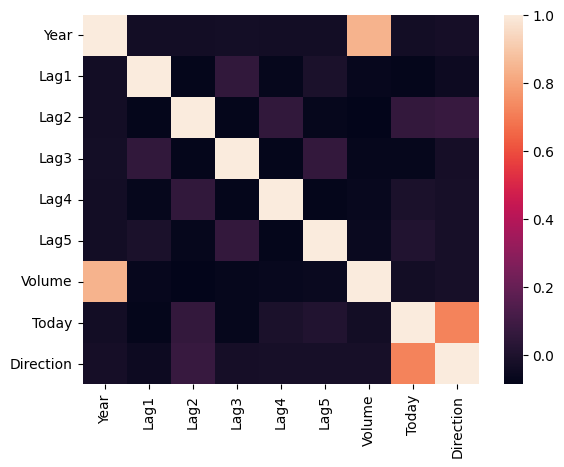

In [100]:
df['Direction'] = df['Direction'].map({'Up': 1, 'Down': 0})
df.head()
summary = df.describe() 
summary = summary.transpose()
summary.head()

corr_result=df.corr()
plt.show()
sns.heatmap(corr_result)  

According to the plot, there seems to be a dual relation between variables; today and direction , volume and year.

(b) Use the full data set to perform a logistic regression with
Direction as the response and the five lag variables plus Volume
as predictors. Use the summary function to print the results. Do
any of the predictors appear to be statistically significant? If so,
which ones?

In [104]:
X = df.drop(['Year','Today', 'Direction'], axis=1)
y = df['Direction']
logreg = sm.Logit(y, X).fit()
#view model summary
print(logreg.summary()) 

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

Lag2 is the most significant one.

(c) Fit the logistic regression model using a training data period
from 1990 to 2008, with Lag2 as the only predictor. Compute the overall fraction of correct predictions
for the held out data (that is, the data from 2009 and 2010).

In [105]:
Train = df[df['Year'] < 2009]
Test = df[df['Year'] > 2008]
X_train = Train['Lag2']
Y_train = Train['Direction']
X_test = Test['Lag2']
Y_test = Test['Direction']

logreg = sm.Logit(Y_train, X_train).fit()
print(logreg.summary())
logreg_test = logreg.predict(X_test)
logreg_test = round(logreg_test)

comparison=abs(logreg_test-Y_test)
result=1 - (np.sum(comparison)/len(Y_test))

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

(d) Repeat (c) using KNN classifier with *K*=1 and *K*=10.

In [75]:
from sklearn.neighbors import KNeighborsRegressor
X_train = np.array(X_train).reshape(-1,1)
Y_train = np.array(Y_train).reshape(-1,1)
X_test = np.array(X_test).reshape(-1,1)
Y_test = np.array(Y_test).reshape(-1,1)

knn_model = KNeighborsRegressor(n_neighbors = 1)
knn_model.fit(X_train, Y_train)  
test_preds=knn_model.predict(X_test) 
comparison=abs(test_preds-Y_test)
result=1 - (np.sum(comparison)/len(Y_test))
print('Overall fraction of correct predictions value for k=1 is', result)

knn_model = KNeighborsRegressor(n_neighbors = 10)
knn_model.fit(X_train, Y_train)  
test_preds=knn_model.predict(X_test) 
comparison=abs(test_preds-Y_test)
result=1 - (np.sum(comparison)/len(Y_test))
print('Overall fraction of correct predictions value for k=10 is', result)

Overall fraction of correct predictions value for k=1 is 0.5096153846153846
Overall fraction of correct predictions value for k=10 is 0.5326923076923078
